QuickSort con Mediana de Tres

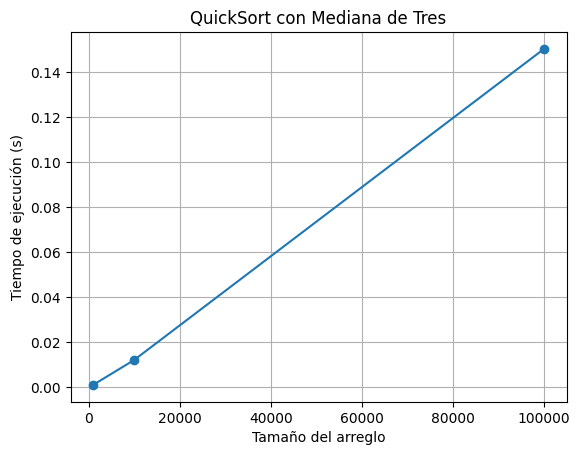

In [1]:
import random
import time
import matplotlib.pyplot as plt

def median_of_three(arr, low, high):
    mid = (low + high) // 2
    if arr[low] > arr[mid]:
        arr[low], arr[mid] = arr[mid], arr[low]
    if arr[low] > arr[high]:
        arr[low], arr[high] = arr[high], arr[low]
    if arr[mid] > arr[high]:
        arr[mid], arr[high] = arr[high], arr[mid]
    arr[mid], arr[high] = arr[high], arr[mid]
    return arr[high]

def partition(arr, low, high):
    pivot = median_of_three(arr, low, high)
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort(arr, low, pi - 1)
        quicksort(arr, pi + 1, high)

def quicksort_median_of_three(arr):
    quicksort(arr, 0, len(arr) - 1)

# Análisis experimental
sizes = [10**3, 10**4, 10**5]
times = []

for size in sizes:
    arr = [random.randint(0, 1000000) for _ in range(size)]
    start_time = time.time()
    quicksort_median_of_three(arr)
    end_time = time.time()
    times.append(end_time - start_time)

# Gráfica
plt.plot(sizes, times, marker='o')
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('QuickSort con Mediana de Tres')
plt.grid(True)
plt.show()

Radix Sort

In [2]:
import random
import string
import time

def counting_sort(arr, exp, max_len):
    n = len(arr)
    output = ["" for _ in range(n)]
    count = [0] * 256  # ASCII characters

    for i in range(n):
        index = ord(arr[i][exp]) if exp < len(arr[i]) else 0
        count[index] += 1

    for i in range(1, 256):
        count[i] += count[i - 1]

    for i in range(n - 1, -1, -1):
        index = ord(arr[i][exp]) if exp < len(arr[i]) else 0
        output[count[index] - 1] = arr[i]
        count[index] -= 1

    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    max_len = len(max(arr, key=len))
    for exp in range(max_len - 1, -1, -1):
        counting_sort(arr, exp, max_len)

# Generar lista de 10,000 elementos alfanuméricos aleatorios
random_strings = [''.join(random.choices(string.ascii_letters + string.digits, k=random.randint(1, 20))) for _ in range(10000)]

# Medir el desempeño de Radix Sort
start_time = time.time()
radix_sort(random_strings)
end_time = time.time()

print(f"Tiempo de ejecución: {end_time - start_time} segundos")

# Verificar que la lista esté ordenada
print(random_strings[:100])  # Imprimir los primeros 100 elementos para verificar

Tiempo de ejecución: 0.06442046165466309 segundos
['0', '0', '0', '0', '0', '0', '0', '00JxPjAqieAzvSWNi', '00RWVrWncuaKN5Hi', '00i', '00t', '019HTxgMQbJMjxHOE', '01D8E1Zpt6', '01DjLGlwwjdPZSAD2iXJ', '01SCna', '02N9xez', '02zAf', '03C55bnLZ7UFMXTHkM', '03J', '03t', '04GTag', '04osZ6', '052BHWq', '052c', '055Kw8mGM5uHhO5HUQD', '07', '07jU', '07rce5hCzvXp', '08TBiQlfsSE', '09EZlfNQW1GV8r', '09YnbkbX4vyzzzEOcpl', '0B3', '0BPBH8MtTXPjghBE', '0C', '0CnAt8J6Zu', '0DKZaJgPp6ia3yY', '0E3NNBQhX3dcPOZ0', '0EfxGS95YciTd', '0G0ICshGFGribpZTG8s', '0GRC5qbXqSnS9Vy', '0GU', '0H8bDMm69', '0Hlz47wX', '0HvWArScXGGT83', '0Hy9J', '0IKV0', '0J8ddyuaXTDYTwbwOkJT', '0JKgWRGr', '0KT', '0Kt9h6e2NVDcmW', '0Kv4w44', '0Lo26R4COIhYcDAnKZvu', '0M', '0MJLtHtB5', '0MYnmDh5GvglIFJVrw1', '0MnNWVNHP', '0NCF6dInnFvpMFqmhY', '0ONrt5sdQumWDv4IwN3', '0P5C6GZ5AJN1v6YB', '0PRPhDa6dYNrpTenghd', '0PuXBmkQ', '0Q', '0Q4wLfQfYh5', '0RB9Yoe1a8fLkMg', '0RCjnpNQInBHHwJl', '0RPTPfOry', '0SeuQg3FIMoo5uDKAe', '0TCIVS5irr', '0TnL7mcbR', 

CombSort